# Importing Required Libraries

In [1]:
from bing_image_downloader import downloader
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

# Data Collection

In [2]:
## LIST OF FRUITS BEING COLLECTED FOR THE CLASSIFICATION
fruits = ["single apple fruit images","single grapes fruit images","single papaya fruit images","single orange fruit images","single banana fruit images"]

## PATH OF CURRENT WORKING DIRECTORY
path = os.getcwd()

## PATH FOR DOWNLOADING THE IMAGES
path_imgs = path + "\\dataset"

## DOWNLOADING THE FRUIT IMAGES FROM BING IMAGE DOWNLOADER
for i in fruits:
    path_fruit = path_imgs + "\\" + i + "\\" + "Image_1.jpg"
    if (os.path.isfile(path_fruit)):
        break
    else:
        downloader.download(i, limit=30,  output_dir='dataset', adult_filter_off=True)

# Preprocessing

In [3]:
## TARGET FOR EACH IMAGE
target = [] 
## IMAGE DATASET IN MATRIX FORM
images = []                

for category in fruits:
    class_num = fruits.index(category)
    path_dir = path_imgs + "\\" + category
    for img in os.listdir(path_dir):
        image_path = path_dir + "\\" + img
        
        if img[-1] == 'g':   #### ALLOWING ONLY .JPG, .JPEG, .PNG FILES                 
            img_array = cv2.imread(image_path)
            img_resized = cv2.resize(img_array, (150, 150))
            images.append(img_resized.flatten())
            target.append(class_num)
            
images = np.array(images)
target = np.array(target)

<BarContainer object of 5 artists>

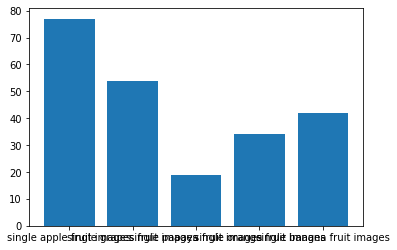

In [4]:
unique,count = np.unique(target,return_counts=True)
plt.bar(fruits,count)

# Train Test Split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(images,target,test_size=0.3,random_state=143)

# Support Vector Machine

In [6]:
svc_lf = SVC(random_state=0)
svc_lf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [7]:
y_svc_lf = svc_lf.predict(x_test)

## CONFUSION MATRIX
cm_svc_lf = confusion_matrix(y_test,y_svc_lf)
print(cm_svc_lf)

## ACCURACY OF THE MODEL
accuracy_score(y_test,y_svc_lf)

[[25  2  0  0  0]
 [ 4  9  0  0  3]
 [ 0  4  1  0  0]
 [ 4  1  0  3  0]
 [ 3  3  0  0  6]]


0.6470588235294118

## Hyperparameter Tuning

In [8]:
svc_nf = SVC(probability=True,random_state=0)

In [9]:
## HYPER PARAMETERS
C = [0.1,1,10]
kernel = ['linear', 'poly', 'rbf']
gamma = [0.0001,0.01,1]
degree = [1,2,3]

param_grid = {'C':C,
              'kernel':kernel,
              'degree':degree,
              'gamma':gamma}

In [10]:
clf = GridSearchCV(svc_nf,param_grid,verbose=4)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] C=0.1, degree=1, gamma=0.0001, kernel=linear ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, degree=1, gamma=0.0001, kernel=linear, score=0.844, total=  19.6s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=linear ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s


[CV]  C=0.1, degree=1, gamma=0.0001, kernel=linear, score=0.656, total=  16.5s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=linear ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.0s remaining:    0.0s


[CV]  C=0.1, degree=1, gamma=0.0001, kernel=linear, score=0.750, total=  20.3s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=linear ....................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   56.3s remaining:    0.0s


[CV]  C=0.1, degree=1, gamma=0.0001, kernel=linear, score=0.839, total=  19.8s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=linear ....................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=linear, score=0.774, total=  20.1s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=poly, score=0.844, total=  19.9s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=poly, score=0.656, total=  19.3s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=poly, score=0.750, total=  19.7s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=poly, score=0.839, total=  19.5s
[CV] C=0.1, degree=1, gamma=0.0001, kernel=poly ......................
[CV]  C=0.1, degree=1, gamma=0.0001, kernel=poly, score=0.774, total=  16.8s
[CV] C=0.1, degree=1, gamma=0.0

[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.323, total=  11.5s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.844, total=   9.5s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.656, total=  10.3s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.750, total=   9.5s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.839, total=  10.6s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.774, total=   9.6s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, score=0.781, total=   9.5s
[CV] C=0.1, degree=2, gamma=0.01, kern

[CV]  C=0.1, degree=3, gamma=0.01, kernel=rbf, score=0.312, total=  13.7s
[CV] C=0.1, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=rbf, score=0.312, total=  14.8s
[CV] C=0.1, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=rbf, score=0.323, total=  13.1s
[CV] C=0.1, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=3, gamma=0.01, kernel=rbf, score=0.323, total=  16.0s
[CV] C=0.1, degree=3, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=3, gamma=1, kernel=linear, score=0.844, total=  11.9s
[CV] C=0.1, degree=3, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=3, gamma=1, kernel=linear, score=0.656, total=  10.9s
[CV] C=0.1, degree=3, gamma=1, kernel=linear .........................
[CV]  C=0.1, degree=3, gamma=1, kernel=linear, score=0.750, total=  12.0s
[CV] C=0.1, degree=3, gamma=1, kernel=linear ...........

[CV] . C=1, degree=1, gamma=1, kernel=poly, score=0.839, total=  10.5s
[CV] C=1, degree=1, gamma=1, kernel=poly .............................
[CV] . C=1, degree=1, gamma=1, kernel=poly, score=0.774, total=  11.9s
[CV] C=1, degree=1, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=1, gamma=1, kernel=rbf, score=0.656, total=  10.8s
[CV] C=1, degree=1, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=1, gamma=1, kernel=rbf, score=0.531, total=  10.7s
[CV] C=1, degree=1, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=1, gamma=1, kernel=rbf, score=0.688, total=  11.0s
[CV] C=1, degree=1, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=1, gamma=1, kernel=rbf, score=0.677, total=  12.1s
[CV] C=1, degree=1, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=1, gamma=1, kernel=rbf, score=0.710, total=  11.2s
[CV] C=1, degree=2, gamma=0.0001, kernel=linear ......................
[CV]  

[CV]  C=1, degree=3, gamma=0.0001, kernel=poly, score=0.719, total=  10.5s
[CV] C=1, degree=3, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=3, gamma=0.0001, kernel=poly, score=0.594, total=  10.9s
[CV] C=1, degree=3, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=3, gamma=0.0001, kernel=poly, score=0.781, total=  10.8s
[CV] C=1, degree=3, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=3, gamma=0.0001, kernel=poly, score=0.839, total=  10.6s
[CV] C=1, degree=3, gamma=0.0001, kernel=poly ........................
[CV]  C=1, degree=3, gamma=0.0001, kernel=poly, score=0.774, total=  11.2s
[CV] C=1, degree=3, gamma=0.0001, kernel=rbf .........................
[CV]  C=1, degree=3, gamma=0.0001, kernel=rbf, score=0.656, total=  12.2s
[CV] C=1, degree=3, gamma=0.0001, kernel=rbf .........................
[CV]  C=1, degree=3, gamma=0.0001, kernel=rbf, score=0.531, total=  12.0s
[CV] C=1, degree=3, gamma=0.0001, kernel=rbf ......

[CV]  C=10, degree=1, gamma=0.01, kernel=linear, score=0.750, total=  10.7s
[CV] C=10, degree=1, gamma=0.01, kernel=linear .......................
[CV]  C=10, degree=1, gamma=0.01, kernel=linear, score=0.839, total=   9.5s
[CV] C=10, degree=1, gamma=0.01, kernel=linear .......................
[CV]  C=10, degree=1, gamma=0.01, kernel=linear, score=0.774, total=  10.9s
[CV] C=10, degree=1, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=1, gamma=0.01, kernel=poly, score=0.844, total=  10.7s
[CV] C=10, degree=1, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=1, gamma=0.01, kernel=poly, score=0.656, total=  10.3s
[CV] C=10, degree=1, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=1, gamma=0.01, kernel=poly, score=0.750, total=  10.7s
[CV] C=10, degree=1, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=1, gamma=0.01, kernel=poly, score=0.839, total=  10.9s
[CV] C=10, degree=1, gamma=0.01, kernel=poly .....

[CV]  C=10, degree=2, gamma=0.01, kernel=rbf, score=0.710, total=  12.9s
[CV] C=10, degree=2, gamma=1, kernel=linear ..........................
[CV]  C=10, degree=2, gamma=1, kernel=linear, score=0.844, total=  12.4s
[CV] C=10, degree=2, gamma=1, kernel=linear ..........................
[CV]  C=10, degree=2, gamma=1, kernel=linear, score=0.656, total=  11.4s
[CV] C=10, degree=2, gamma=1, kernel=linear ..........................
[CV]  C=10, degree=2, gamma=1, kernel=linear, score=0.750, total=  11.9s
[CV] C=10, degree=2, gamma=1, kernel=linear ..........................
[CV]  C=10, degree=2, gamma=1, kernel=linear, score=0.839, total=  11.9s
[CV] C=10, degree=2, gamma=1, kernel=linear ..........................
[CV]  C=10, degree=2, gamma=1, kernel=linear, score=0.774, total=  11.9s
[CV] C=10, degree=2, gamma=1, kernel=poly ............................
[CV]  C=10, degree=2, gamma=1, kernel=poly, score=0.781, total=  12.0s
[CV] C=10, degree=2, gamma=1, kernel=poly .......................

[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.531, total=  12.4s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.688, total=  11.8s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.677, total=  12.2s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.710, total=  11.7s


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 82.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 3],
                         'gamma': [0.0001, 0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

### Prediction and Accuracy

In [11]:
y_svc_nf = clf.predict(x_test)

## CONFUSION MATRIX
cm_svc_nf = confusion_matrix(y_test,y_svc_nf)
print(cm_svc_nf)

## ACCURACY OF THE MODEL
accuracy_score(y_test,y_svc_nf)

[[26  1  0  0  0]
 [ 2 12  0  0  2]
 [ 0  3  2  0  0]
 [ 3  1  0  4  0]
 [ 2  4  0  0  6]]


0.7352941176470589